In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True)


In [15]:
print(torch.__version__)
print(torchvision.__version__)

1.8.1+cu101
0.9.1+cu101


In [16]:
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [17]:
class Network(nn.Module):
  def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=2, out_channels=2, kernel_size=2)
        self.conv2 = nn.Conv2d(in_channels=2, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

  def forward(self, t, s):
        # (1) input layer
        t = t
       // s = torch.LongTensor(1,1).random_() % 10
        y_onehot = torch.FloatTensor(1, 10)

        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)

        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)
        out = t + y_onehot

        return t, out


In [18]:
train_set = torchvision.datasets.MNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

In [19]:
network = Network()

In [20]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=10)
sample = next(iter(train_set)) 
images, labels = sample
images = images.unsqueeze(0)
#images.shape
labels

5

In [21]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=10)
sample = next(iter(train_set)) 
images, labels = sample
images = images.unsqueeze(0)
images.shape
labels

5

In [22]:
t = torch.tensor([
    [1, 0, 0, 2],
    [0, 3, 3, 0],
    [4, 0, 0, 5]
], dtype=torch.float32)
t.max(dim=1)
t

tensor([[1., 0., 0., 2.],
        [0., 3., 3., 0.],
        [4., 0., 0., 5.]])

In [23]:
x =torch.randn(5, 5) #requires_grad = False by defaults
y =torch.randn(5, 5) #requires_grad = False by defaults
z =torch.randn((5, 5), requires_grad=True)
a = x + y
b = a + z
a,b

(tensor([[-1.1319,  0.4570, -1.6751,  0.0794, -1.5786],
         [-1.6500,  1.9258,  0.1485,  0.4273, -1.2617],
         [ 0.1496,  1.0248, -1.8788,  0.8784, -1.0394],
         [-2.3865, -2.1075,  1.1116, -1.4450, -0.0293],
         [-0.9506,  1.1874, -3.2383, -1.3372,  0.2102]]),
 tensor([[-1.1625, -0.0509, -0.3413,  0.4480, -3.1315],
         [ 0.2624,  1.3073, -0.1877,  1.3243, -0.3357],
         [ 1.6399,  2.2037, -2.1006,  0.4873, -0.8215],
         [-4.3124, -2.4185,  0.9845, -2.9754,  1.3664],
         [-1.3361,  2.6350, -4.0164, -1.8819,  0.1543]], grad_fn=<AddBackward0>))

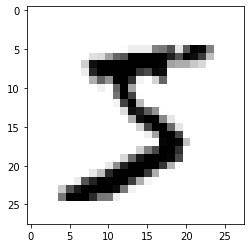

In [24]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

In [25]:

from torch.utils.data import Dataset

class Digits(Dataset):
  def __init__(self, csv_file):
    self.data = torch.utils.data.DataLoader(train_set)

  def __getitem__(self, index):
    r = self.data.iloc[index]
    label, image = r
    return label, image

  def __len__(self):
    return len(self.data)

In [26]:
preds = network(images)
preds

TypeError: ignored

In [ ]:
preds.shape

In [ ]:
labels

In [ ]:
preds.argmax(dim=1)

In [ ]:
F.softmax(preds,dim=1)

In [ ]:
F.softmax(preds,dim=1).sum()

In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=1)
optimizer = optim.Adam(network.parameters(), lr=0.01)

for epoch in range(10):

    total_loss = 0
    total_correct = 0

    batch = next(iter(train_loader))
    images, labels = batch

    preds = network(images) 
    loss = F.cross_entropy(preds, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_loss += loss.item()
    total_correct += get_num_correct(preds, labels)

    print(
        preds.argmax(dim=1),
        "epoch", epoch, 
        "total_correct:", total_correct, 
        "loss:", total_loss
    )